In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
in_files = list(Path("./in/").glob("*.txt"))

Inputs = []
for p in in_files:
    with open(p, mode="r") as f:
        N, D, Q = map(int, f.readline().split())
        W = list(map(int, f.readline().split()))
        Inputs.append([N, D, Q, W])
        
print(Inputs)

[[31, 2, 128, [42789, 26023, 52131, 52694, 41816, 1734, 25720, 142117, 34123, 18227, 74649, 4126, 62911, 83007, 175627, 2819, 232807, 210456, 70234, 184590, 86146, 26456, 48810, 33189, 180024, 134174, 45597, 59565, 56446, 124428, 75874]], [56, 6, 1120, [38227, 56853, 191155, 31224, 43322, 78710, 228334, 59526, 31191, 333210, 88208, 222492, 95741, 121586, 73263, 168615, 267185, 33248, 152123, 7393, 34700, 321363, 135066, 132182, 110200, 213852, 52680, 40679, 623372, 52914, 44206, 7902, 131881, 259726, 116222, 63232, 170356, 84694, 50491, 182818, 71102, 133965, 71027, 56196, 21316, 141624, 352580, 92845, 4851, 348209, 6410, 70355, 3804, 18293, 61738, 162268]], [94, 5, 2009, [24741, 199514, 115883, 43350, 23115, 109891, 1903, 5006, 52086, 19775, 95939, 34779, 174381, 93062, 10751, 370533, 111751, 67623, 41358, 10871, 89225, 78537, 4065, 32565, 263921, 4691, 35360, 195162, 190754, 392147, 8018, 128368, 70978, 65, 77621, 260543, 123954, 92701, 390126, 57500, 50175, 4587, 17605, 100226, 7539

In [41]:
dst_dir = Path("./hist")
dst_dir.mkdir(exist_ok=True)

for i, (N, D, Q, X) in enumerate(Inputs):
    mean = round(sum(X)/N)
    target = round(sum(X)/D)
    num = str(i).zfill(4)
    f = num + ".png"
    title = f"{num}.txt, N: {N}, D: {D}, Q: {Q}, mean: {mean}, target: {target}"
    sns.histplot(X, binwidth=20000)
    plt.axvline(mean, c="b")
    # plt.axvline(target, c="r")
    plt.title(title)
    plt.ticklabel_format(style='plain',axis='x')
    plt.tight_layout()
    plt.savefig(dst_dir / f)
    plt.close()

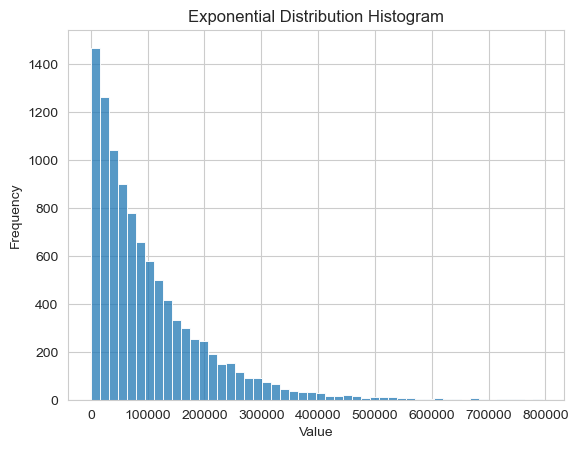

In [29]:
import numpy as np

def generate_exponential_random_numbers(n=10000, scale=1.0):
    """
    指数分布に従う乱数を発生させる関数。

    n: 生成する乱数の数
    scale: 指数分布のスケールパラメータ（λの逆数）
    """
    return np.random.exponential(scale, n)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram(data, bins=50, title="Histogram", xlabel="Value", ylabel="Frequency"):
    """
    データをヒストグラムに表示する関数。

    data: ヒストグラムに表示するデータ
    bins: ビンの数
    """
    sns.histplot(data, bins=bins, kde=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ticklabel_format(style='plain',axis='x')
    plt.show()

data = generate_exponential_random_numbers(scale=10**5)
plot_histogram(data, title="Exponential Distribution Histogram", xlabel="Value", ylabel="Frequency")


In [31]:
data.mean()

99477.9610172574

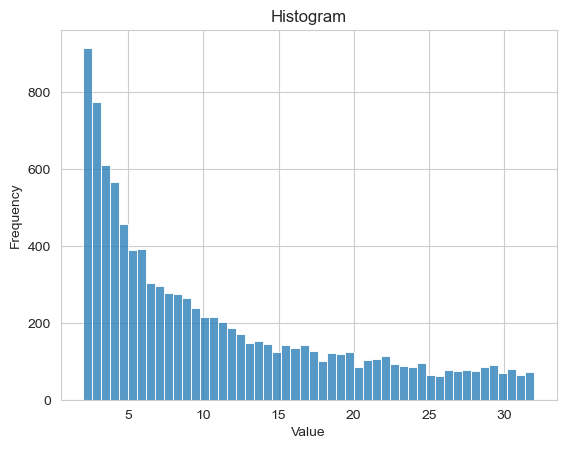

In [42]:
from random import randint, uniform

Ps = []
Ns = []
Rs = []
for _ in range(10000):
    N = randint(30, 100)
    p = pow(2, uniform(1, 5))
    Q = round(N * p)
    nc2 = N * (N-1) // 2
    Ps.append(p)
    Ns.append(N)
    Rs.append(p)
plot_histogram(Rs)

In [58]:
Ns = []
num = 10
SS = [[] for _ in range(num+1)]
dst_dir = Path("./QQ")
dst_dir.mkdir(parents=True, exist_ok=True)
for i, (N, D, Q, W) in enumerate(Inputs):
    W.sort()
    # min~maxまでをnum分割して拾う
    for v in range(num+1):
        idx = round((0*(num-v) + (N-1)*v) / num)
        if v == num:
            idx = N-1
        SS[v].append(W[idx])
    
    sns.scatterplot(x=list(range(N)), y=W)
    plt.tight_layout()
    plt.savefig(dst_dir / f"{str(i).zfill(4)}.png")
    plt.close()
    Ns.append(N)

# for v in range(num+1):
#     plot_histogram(SS[v], bins=20)

In [59]:
Ns = []
dst_dir = Path("./QQ")
dst_dir.mkdir(parents=True, exist_ok=True)
for i, (N, D, Q, W) in enumerate(Inputs):
    W.sort()    
    sns.scatterplot(x=[x/N for x in range(N)], y=W)
    Ns.append(N)

plt.tight_layout()
plt.savefig(dst_dir / f"all.png")
plt.close()

In [4]:
Xs = []
Ys = []
for i, (N, D, Q, W) in enumerate(Inputs):
    W.sort()    
    X = [x/N for x in range(N)]
    for x in X:
        Xs.append(x)
    for w in W:
        Ys.append(w)

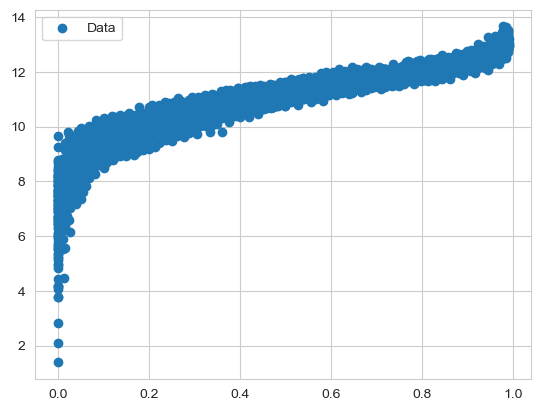

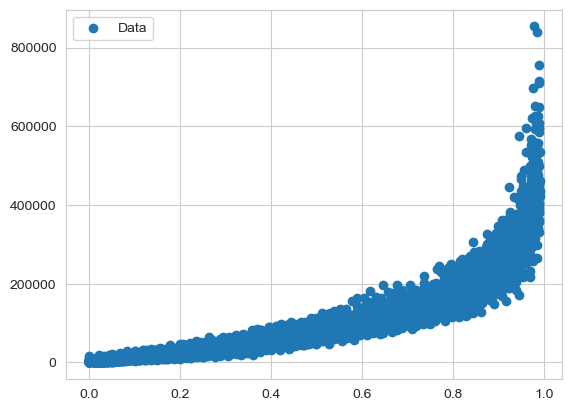

In [22]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import beta as beta_func
import matplotlib.pyplot as plt



# オリジナルデータとフィット結果のプロット
plt.scatter(Xs, np.log(np.array(Ys)), label='Data')
# plt.scatter(Xs, func(np.array(Xs), a, b, c), c='r', label='Fitted function')
plt.legend()
plt.show()

plt.scatter(Xs, np.array(Ys), label='Data')
plt.legend()
plt.show()

# 前半は直線、後半は指数関数

[-0.025  0.025  0.075  0.125  0.175  0.225  0.275  0.325  0.375  0.425
  0.475  0.525  0.575  0.625  0.675  0.725  0.775  0.825  0.875  0.925
  0.975  1.025]


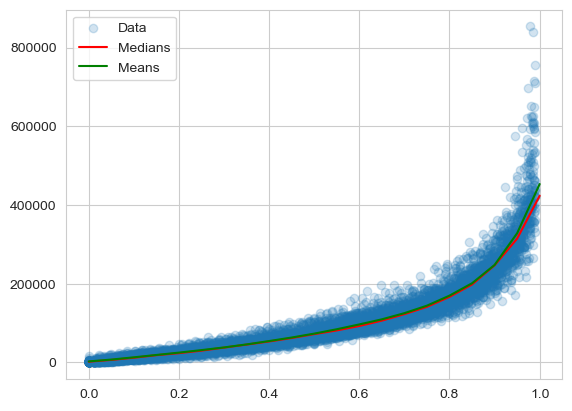

[1992.5,
 6441.0,
 12016.0,
 18490.0,
 23650.5,
 30017.0,
 37738.0,
 45407.0,
 53300.0,
 62093.0,
 71986.5,
 81416.0,
 92701.0,
 106377.0,
 122775.0,
 141369.0,
 166698.0,
 198079.0,
 246776.0,
 314715.0,
 423730.0]

In [32]:
x = np.array(Xs)
y = np.array(Ys)


# X軸上でのビンの定義
bin_width = 0.05
bins = np.arange(-bin_width/2, 1 + bin_width*1.5, bin_width)
bin_centers = (bins[:-1] + bins[1:]) / 2
medians = []
means = []
print(bins)

# 各ビンでの中央値の計算
for start, end in zip(bins[:-1], bins[1:]):
    mask = (x >= start) & (x < end)
    medians.append(np.median(y[mask]))
    means.append(np.mean(y[mask]))

# 結果のプロット
plt.scatter(x, y, alpha=0.2, label="Data")
plt.plot(bin_centers, medians, 'r-', label="Medians")
plt.plot(bin_centers, means, 'g-', label="Means")
plt.legend()
plt.show()

medians

In [ ]:
for s in SS:
    sns.scatterplot(x=Ns, y=s)
    plt.show()

In [33]:
Inputs

[[31,
  2,
  128,
  [1734,
   2819,
   4126,
   18227,
   25720,
   26023,
   26456,
   33189,
   34123,
   41816,
   42789,
   45597,
   48810,
   52131,
   52694,
   56446,
   59565,
   62911,
   70234,
   74649,
   75874,
   83007,
   86146,
   124428,
   134174,
   142117,
   175627,
   180024,
   184590,
   210456,
   232807]],
 [56,
  6,
  1120,
  [3804,
   4851,
   6410,
   7393,
   7902,
   18293,
   21316,
   31191,
   31224,
   33248,
   34700,
   38227,
   40679,
   43322,
   44206,
   50491,
   52680,
   52914,
   56196,
   56853,
   59526,
   61738,
   63232,
   70355,
   71027,
   71102,
   73263,
   78710,
   84694,
   88208,
   92845,
   95741,
   110200,
   116222,
   121586,
   131881,
   132182,
   133965,
   135066,
   141624,
   152123,
   162268,
   168615,
   170356,
   182818,
   191155,
   213852,
   222492,
   228334,
   259726,
   267185,
   321363,
   333210,
   348209,
   352580,
   623372]],
 [94,
  5,
  2009,
  [65,
   1903,
   4065,
   4092,
   4587,
   

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_groups(result, result_i):
    # 各要素（ID）がどのグループに属しているかの情報を取得
    id_to_group = {}
    id_to_W = {}
    for group_idx, (group, Ws) in enumerate(zip(result_i, result)):
        for i, w in zip(group, Ws):
            id_to_group[i] = group_idx
            id_to_W[i] = w

    # ID順にソート
    sorted_ids = sorted(id_to_group.keys())
    
    # 最大25色のカラーパレットを取得
    num_groups = len(result)
    group_colors = sns.color_palette("husl", num_groups)
    id_colors = [group_colors[id_to_group[id]] for id in sorted_ids]
    id_W = [id_to_W[id] for id in sorted_ids]

    plt.scatter(sorted_ids, id_W, c=id_colors, s=15)
    plt.yticks([])
    plt.xlabel("ID")
    plt.title("Group Assignment by ID")
    
    # カラーバーの凡例を追加
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=group_colors[i], markersize=10) for i in range(num_groups)]
    plt.legend(handles, [f"Group {i+1}" for i in range(num_groups)], loc="best")

    plt.show()

31 2 128
Group 1:	len: 17	Total: 1205391	[232807, 180024, 142117, 134174, 86146, 75874, 70234, 56446, 52131, 45597, 42789, 34123, 26023, 18227, 4126, 2819, 1734] 
Group 2:	len: 14	Total: 1203918	[210456, 184590, 175627, 124428, 83007, 74649, 62911, 59565, 52694, 48810, 41816, 33189, 26456, 25720] 
73650


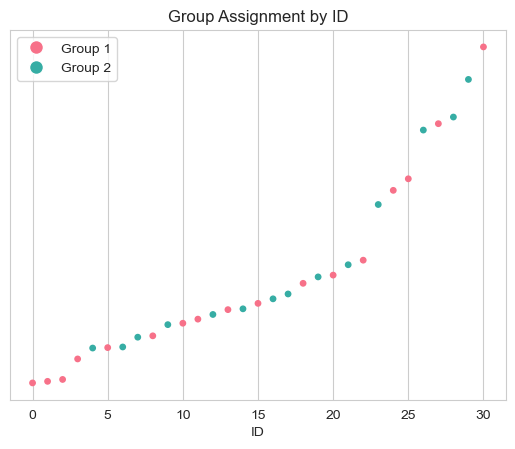


56 6 1120
Group 1:	len: 8	Total: 1126721	[623372, 141624, 116222, 78710, 61738, 50491, 33248, 21316] 
Group 2:	len: 9	Total: 1132816	[352580, 191155, 170356, 133965, 88208, 71102, 59526, 34700, 31224] 
Group 3:	len: 9	Total: 1135852	[348209, 213852, 152123, 132182, 92845, 71027, 56196, 38227, 31191] 
Group 4:	len: 11	Total: 1124540	[333210, 222492, 162268, 131881, 84694, 73263, 56853, 43322, 7902, 4851, 3804] 
Group 5:	len: 9	Total: 1124982	[321363, 228334, 168615, 121586, 110200, 63232, 52680, 40679, 18293] 
Group 6:	len: 10	Total: 1121814	[267185, 259726, 182818, 135066, 95741, 70355, 52914, 44206, 7393, 6410] 
492543


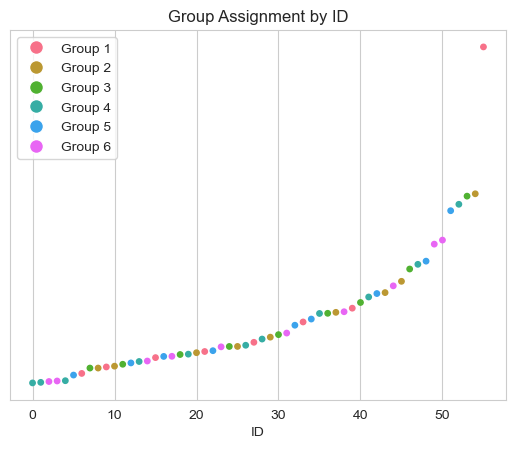


94 5 2009
Group 1:	len: 19	Total: 1704461	[392147, 195383, 174381, 127296, 115883, 106692, 98471, 90201, 78537, 70978, 54780, 53055, 47333, 37834, 27775, 14535, 11097, 8018, 65] 
Group 2:	len: 18	Total: 1705277	[390126, 199514, 138823, 128278, 119915, 111751, 100226, 93062, 79801, 75391, 67623, 53492, 44748, 41358, 24741, 23115, 8726, 4587] 
Group 3:	len: 19	Total: 1706092	[370533, 217446, 162741, 127372, 117513, 109891, 99121, 92701, 79618, 72396, 57500, 51308, 44394, 43350, 23383, 19775, 10505, 4642, 1903] 
Group 4:	len: 19	Total: 1706086	[263921, 253905, 190754, 136358, 120247, 112529, 101724, 95939, 89225, 72985, 64219, 54149, 50539, 35360, 32565, 11698, 10871, 5006, 4092] 
Group 5:	len: 19	Total: 1707112	[260543, 255351, 195162, 128368, 123954, 113889, 103659, 95349, 82101, 77621, 69162, 52086, 50175, 34779, 27801, 17605, 10751, 4691, 4065] 
88935


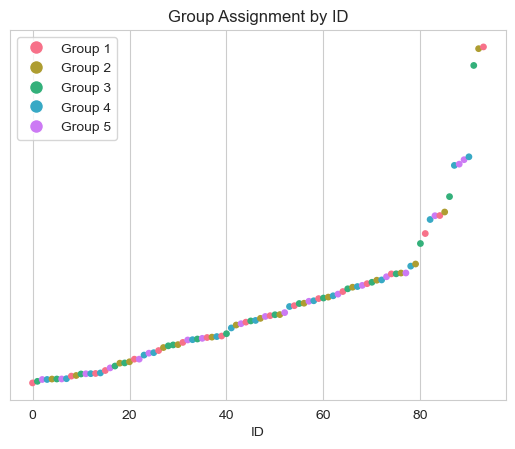


80 6 2288
Group 1:	len: 13	Total: 1472465	[714853, 187220, 154813, 100407, 90784, 76109, 47178, 39483, 25139, 24203, 8474, 1937, 1865] 
Group 2:	len: 13	Total: 1471969	[388125, 217918, 188785, 156323, 129615, 93877, 78483, 61060, 54175, 45069, 24890, 21759, 11890] 
Group 3:	len: 13	Total: 1472768	[351998, 234152, 192752, 161469, 137597, 94511, 79654, 63807, 53426, 41726, 25002, 22923, 13751] 
Group 4:	len: 14	Total: 1474159	[290466, 244000, 193218, 183188, 144577, 106264, 87268, 73039, 50925, 37745, 30078, 21432, 6349, 5610] 
Group 5:	len: 14	Total: 1472753	[276164, 248606, 210098, 161747, 154945, 118583, 83138, 60608, 59504, 37305, 26408, 22526, 12020, 1101] 
Group 6:	len: 13	Total: 1473131	[269902, 262542, 198079, 177911, 146608, 116677, 80163, 67946, 51908, 38214, 31551, 17434, 14196] 
67447


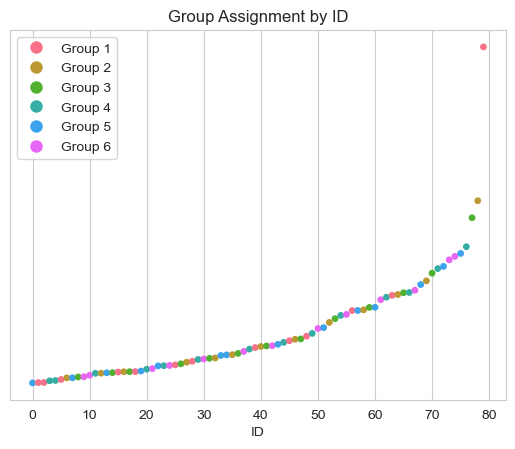

In [53]:
def greedy_partition(W, D):
    # 各グループの総和を保持するリストを初期化
    group_sums = [0] * D
    
    # グループを表す2次元リストを初期化
    groups = [[] for _ in range(D)]
    groups_id = [[] for _ in range(D)]
    
    # 重みを降順にソート
    sorted_weights = sorted([[w, i] for i, w in enumerate(W)], reverse=True)
    
    for w, i in sorted_weights:
        # 現時点で最小の合計重みを持つグループを見つける
        min_group_idx = group_sums.index(min(group_sums))
        
        # そのグループに重みを追加
        groups[min_group_idx].append(w)
        groups_id[min_group_idx].append(i)
        
        # グループの合計重みを更新
        group_sums[min_group_idx] += w

    return groups, groups_id


def calc_score(result):
    sums = []
    for i, group in enumerate(result):
        sums.append(np.sum(group))
    return np.std(sums)
    

for i, (N, D, Q, W) in enumerate(Inputs):
    print(N, D, Q)
    result, result_i = greedy_partition(W, D)
    for gi, group in enumerate(result):
        print(f"Group {gi + 1}:\tlen: {len(group)}\tTotal: {sum(group)}\t{group} ")
    std = calc_score(result)
    print(round(100 * std))
    plot_groups(result, result_i)
    print()
    if i == 3:
        break

In [60]:
def expected_value_of_rank(rank, N, lambda_val):
    K = rank + 1  # rankは0から始まるため、Kはrank + 1
    return sum(1 / (N - i) for i in range(K)) / lambda_val

def expected_values_of_ranks(ranks, N, lambda_val=1e-5):
    return [expected_value_of_rank(rank, N, lambda_val) for rank in ranks]

# 使用例
N = 30
ranks = list(range(N))
E = expected_values_of_ranks(ranks, N)



<Axes: >

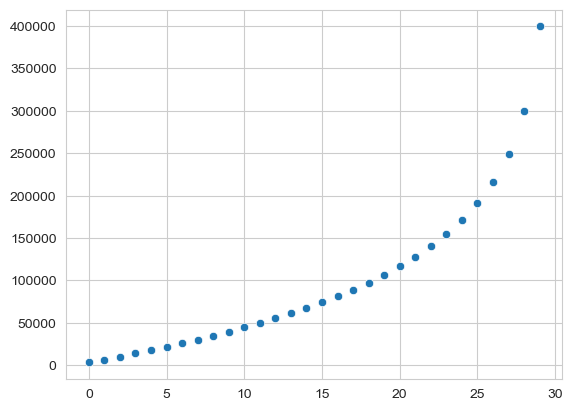

In [61]:
sns.scatterplot(x=ranks, y=E)

In [75]:
import random

for i, (N, D, Q, W) in enumerate(Inputs):
    print(N, D, Q, W)
    oneleft = sum(random.sample(W, N//2*2))
    one = sum(W) - oneleft
    print(one)
    left = W[:]
    del left[left.index(one)]
    print(left, len(left), sum(left) == oneleft)
    for j in range(50):
        half = sum(random.sample(left, N//2))
        print(half, oneleft-half, abs(half*2 - oneleft), half / oneleft)
    
    if i == 0:
        break

31 2 128 [1734, 2819, 4126, 18227, 25720, 26023, 26456, 33189, 34123, 41816, 42789, 45597, 48810, 52131, 52694, 56446, 59565, 62911, 70234, 74649, 75874, 83007, 86146, 124428, 134174, 142117, 175627, 180024, 184590, 210456, 232807]
26456
[1734, 2819, 4126, 18227, 25720, 26023, 33189, 34123, 41816, 42789, 45597, 48810, 52131, 52694, 56446, 59565, 62911, 70234, 74649, 75874, 83007, 86146, 124428, 134174, 142117, 175627, 180024, 184590, 210456, 232807] 30 True
1250279 1132574 117705 0.5246983343076556
1173977 1208876 34899 0.4926770556135859
1456549 926304 530245 0.6112626334901902
928509 1454344 525835 0.38966272783088174
1393379 989474 403905 0.5847523955527261
1116864 1265989 149125 0.46870872857033147
991855 1390998 399143 0.4162468268080322
1150960 1231893 80933 0.48301762634959017
1030895 1351958 321063 0.4326305483384833
1183741 1199112 15371 0.4967746646561915
1333490 1049363 284127 0.559619078474417
1046606 1336247 289641 0.43922390512549453
1324279 1058574 265705 0.5557535441758

In [83]:
for i, (N, D, Q, W) in enumerate(Inputs):
    # print(N, D, Q)
    if N % 2:
        continue
    
    max_is_in_larger = 0
    for j in range(1000):
        L = set(random.sample(W, N//2))
        R = set(W) - L
        l, r = sum(L), sum(R)
        if l < r:
            L, R = R, L
        # lが大きい
        max_is_in_larger += int(max(W) in L)
    print(max_is_in_larger / 1000)
    

0.768
0.64
0.778
0.64
0.63
0.716
0.738
0.708
0.74
0.662
0.683
0.67
0.672
0.679
0.662
0.666
0.748
0.727
0.62
0.722
0.812
0.645
0.651
0.764
0.71
0.683
0.792
0.656
0.615
0.678
0.626
0.781
0.698
0.647
0.676
0.687
0.728
0.676
0.662
0.657
0.706
0.745
0.681
0.666
0.778
0.729
0.7
0.727
0.894
0.711
0.642
0.659
